In [25]:
#Import library 
from sklearn import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
# import seaborn as sns
import seaborn as sns
from sklearn.decomposition import PCA as PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as pl
from sklearn import datasets
from sklearn import cluster
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from IPython.display import Image

## Attribute Information:

On donne le nom de la variable, son type, l’unité de mesure et un bref
la description. Le "Centre de service de transfusion sanguine" est un problème de classification.
L’ordre de cette liste correspond à l’ordre des chiffres le long des lignes de la base de données.

- Récence - mois depuis le dernier don (T),
- Fréquence - nombre total de dons (F),
- Total - sang total donné en c.c. (M),
- Temps - mois depuis le premier don (T), et une variable binaire indiquant s'il a fait un don de sang en mars 2007 (1 représenter le don de sang; 0 signifie ne pas donner de sang).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9767fcd9e8>,
      dtype=object)

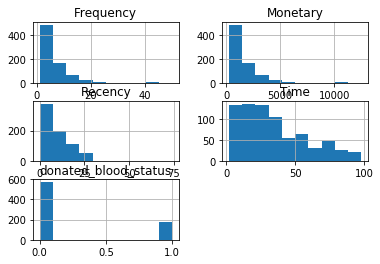

In [2]:
# load and prépare dataset
# Charge et prépare le dataset
dataset = np.genfromtxt("/home/data/transfusion.data.csv", delimiter=",",skip_header=1)
readData = pd.read_csv("/home/data/transfusion.data.csv", delimiter=",")
readData.hist()

## Dataset Introduce

In [3]:
readData

Recency  Frequency  Monetary  Time  donated_blood_status
0          2         50     12500    98                     1
1          0         13      3250    28                     1
2          1         16      4000    35                     1
3          2         20      5000    45                     1
4          1         24      6000    77                     0
5          4          4      1000     4                     0
6          2          7      1750    14                     1
7          1         12      3000    35                     0
8          2          9      2250    22                     1
9          5         46     11500    98                     1
10         4         23      5750    58                     0
11         0          3       750     4                     0
12         2         10      2500    28                     1
13         1         13      3250    47                     0
14         2          6      1500    15                     1
15         2          5      1250    11                     1
16         2         14      3500    48                     1
17         2         15      3750    49                     1
18         2          6      1500    15                     1
19         2          3       750     4                     1
20         2          3       750     4                     1
21         4         11      2750    28                     0
22         2          6      1500    16                     1
23         2          6      1500    16                     1
24         9          9      2250    16                     0
25         4         14      3500    40                     0
26         4          6      1500    14                     0
27         4         12      3000    34                     1
28         4          5      1250    11                     1
29         4          8      2000    21                     0
..       ...        ...       ...   ...                   ...
718       21          3       750    35                     0
719       23          8      2000    69                     0
720       21          3       750    38                     0
721       23          3       750    35                     0
722       21          3       750    40                     0
723       23          2       500    28                     0
724       21          1       250    21                     0
725       21          1       250    21                     0
726       25          6      1500    50                     0
727       21          1       250    21                     0
728       21          1       250    21                     0
729       23          3       750    39                     0
730       21          2       500    33                     0
731       14          3       750    79                     0
732       23          1       250    23                     1
733       23          1       250    23                     0
734       23          1       250    23                     0
735       23          1       250    23                     0
736       23          1       250    23                     0
737       23          1       250    23                     0
738       23          1       250    23                     0
739       23          4      1000    52                     0
740       23          1       250    23                     0
741       23          7      1750    88                     0
742       16          3       750    86                     0
743       23          2       500    38                     0
744       21          2       500    52                     0
745       23          3       750    62                     0
746       39          1       250    39                     0
747       72          1       250    72                     0

[748 rows x 5 columns]

## Normalisation de la donnée

In [4]:
# Input
# entrée
X = dataset[:,0:4]

#Normalization of data / normalise le dataset
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
# Cree un objet pour transformer le dataset sous la normalisation minmax
x_scaled = min_max_scaler.fit_transform(X)

# Run the normalizer on the dataframe
# Effectue la normalisation et transforme en type dataframe
X = pd.DataFrame(x_scaled)

# View the dataframe
# Affichage du tableau
# X

In [5]:
#OutPut predict
Y = dataset[:,4]
# print('\n'.join(map(str, Y)))

# Clustering Part

## Data normalization

In [6]:
# Normalization of data / normalise le dataset
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
# Cree un objet pour transformer le dataset sous la normalisation minmax
x_scaled = min_max_scaler.fit_transform(dataset)

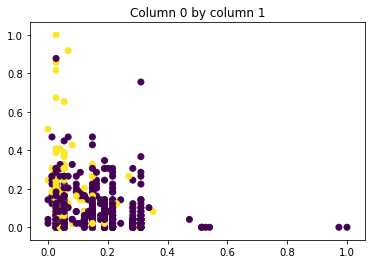

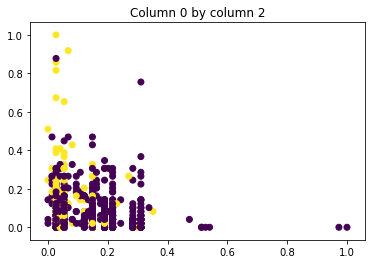

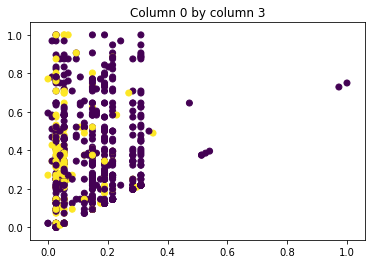

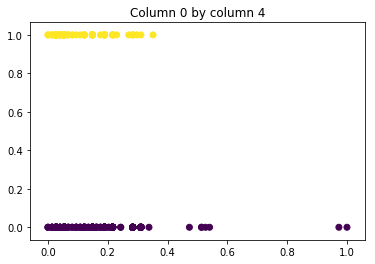

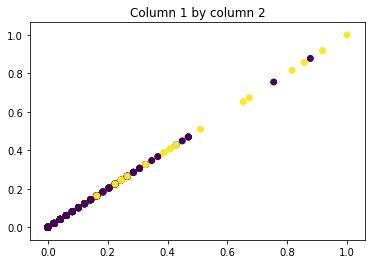

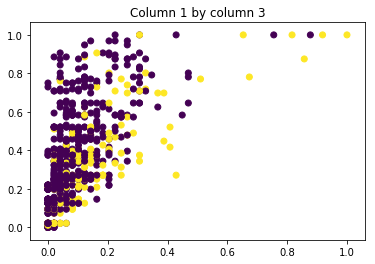

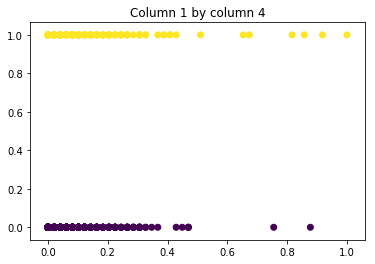

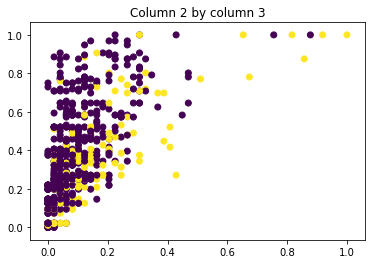

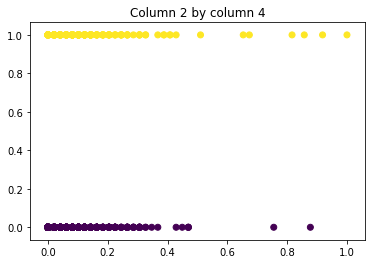

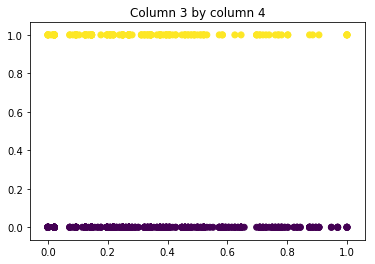

In [7]:
for i in range(0, x_scaled.shape[1]-1):
    for j in range(i+1, x_scaled.shape[1]):
        pl.scatter(x_scaled[::, i], x_scaled[::, j], c=x_scaled[::,4])
        pl.title("Column " + str(i) + " by column " + str(j))
        pl.show()

In [8]:
correlation_matrix = np.corrcoef(np.transpose(x_scaled))
mean_corr = correlation_matrix.mean(axis=0)
print(mean_corr)

[0.10305166 0.53416565 0.53416565 0.47892885 0.22430872]


## Data reduction and visualization

Suppression de la deuxieme colonne du DataSet car il ya trop de correlation avec la colonne 1
- Le nouveau dataset généré : lighter_data_set header (Recency  Frequency Time  donated_blood_status)

In [9]:
lighter_data_set = np.delete(x_scaled, 2, 1)
correlation_matrix = np.corrcoef(np.transpose(lighter_data_set))
mean_corr = correlation_matrix.mean(axis=0)
print(mean_corr)

[0.17450094 0.41770706 0.43992599 0.22572754]


In [10]:
# print('\n'.join(map(str, lighter_data_set)))

On veut de nouveau alléger le dataset, on supprime de nouveau la valeur la plus élevée
- final header after delete : Recency Frequency Time

In [11]:
final_data_set = np.delete(lighter_data_set, 3, 1)
# print('\n'.join(map(str, final_data_set)))

## Sauvegarde de la nouvelle donnée

In [12]:
np.savetxt("final_data_set_blood.csv", final_data_set, delimiter=",")

In [13]:
np.savetxt("lighter_data_set_blood.csv", lighter_data_set, delimiter=",")

## PCA & LDA

In [14]:
pca_obj = PCA(n_components=3)
blood_transfusion_pca = pca_obj.fit_transform(x_scaled)
# print('\n'.join(map(str, blood_transfusion_pca)))

In [15]:
lda_obj = LDA(n_components=3)
blood_transfusion_lda = lda_obj.fit(x_scaled, Y).transform(x_scaled)
# print('\n'.join(map(str, blood_transfusion_lda)))

/opt/conda/envs/envPython36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


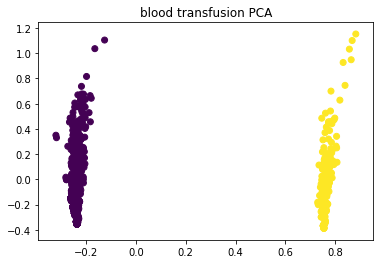

In [37]:
pl.scatter(blood_transfusion_pca[::, 0], blood_transfusion_pca[::, 1], c=Y)
pl.title("blood transfusion PCA")
pl.show()

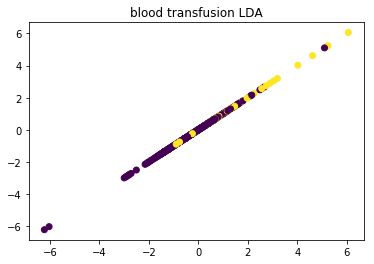

In [17]:
pl.scatter(blood_transfusion_lda[::, 0], blood_transfusion_lda[::, 0], c=Y)
pl.title("blood transfusion LDA")
pl.show()

# Part F : Clustering

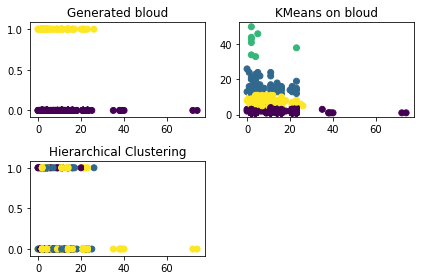

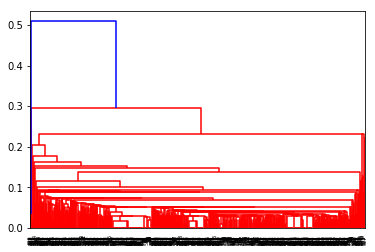

In [18]:
fig = pl.figure()
plot1 = fig.add_subplot(221)
plot1.scatter(dataset[::, 0],dataset[::, 4], c=Y)
plot1.set_title("Generated bloud")

plot2 = fig.add_subplot(222)
kmeans_blobs = cluster.KMeans(n_clusters=4).fit_predict(dataset[:,0:4])
plot2.scatter(dataset[::, 0],dataset[::, 1], c=kmeans_blobs)
plot2.set_title("KMeans on bloud")

plot3 = fig.add_subplot(223)
agglomeration = cluster.AgglomerativeClustering(n_clusters=4).fit_predict(dataset[:,0:4])
plot3.scatter(dataset[::, 0],dataset[::, 4], c=agglomeration)
plot3.set_title("Hierarchical Clustering")

pl.tight_layout()
fig = pl.gcf()
pl.show()

# linked = linkage(dataset[:,0:4], 'single')
linked = linkage(X, 'single')

pl.figure()
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
pl.show()

In [19]:
km = KMeans(n_clusters=4,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

In [20]:
y_km = km.fit_predict(dataset[:,0:4])

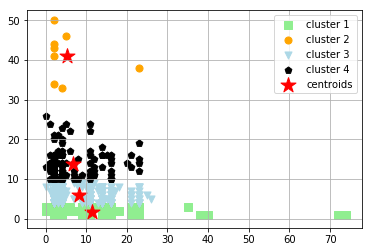

In [21]:
>>> plt.scatter(dataset[y_km==0,0],
                dataset[y_km==0,1],
                s=50,
                c='lightgreen',
                marker='s',
                label='cluster 1')

plt.scatter(dataset[y_km==1,0],
            dataset[y_km==1,1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')

plt.scatter(dataset[y_km==2,0],
            dataset[y_km==2,1],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3')

plt.scatter(dataset[y_km==3,0],
            dataset[y_km==3,1],
            s=50,
            c='black',
            marker='p',
            label='cluster 4')

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.show()                            

For n_clusters = 2 The average silhouette_score is : 0.39435096628252736


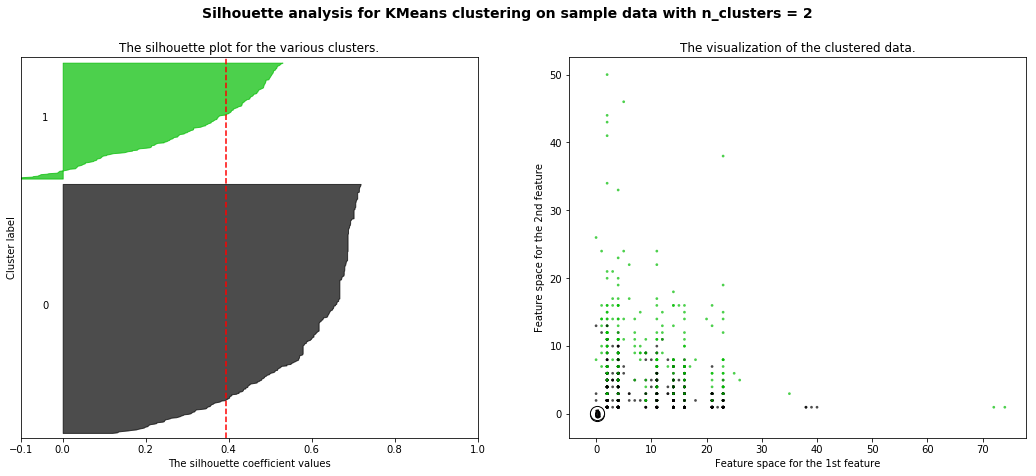

For n_clusters = 3 The average silhouette_score is : 0.24826346933356472


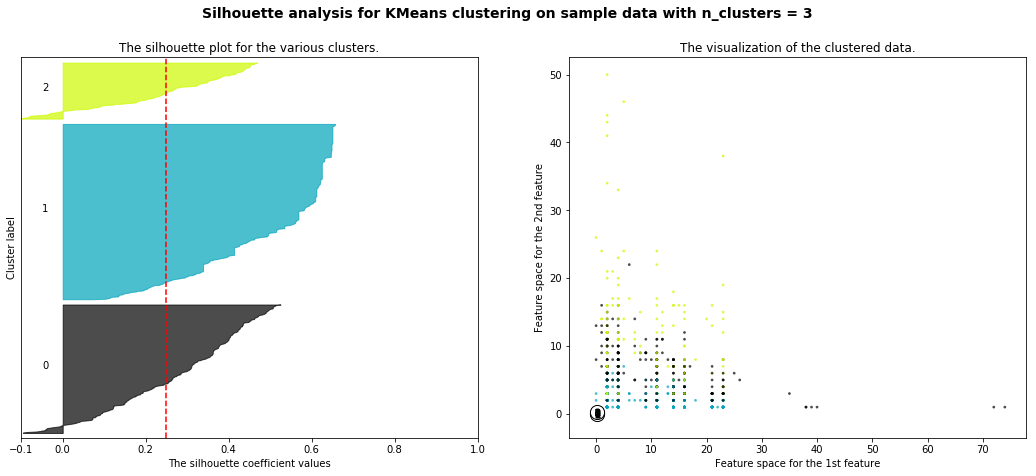

For n_clusters = 4 The average silhouette_score is : 0.24082848520349895


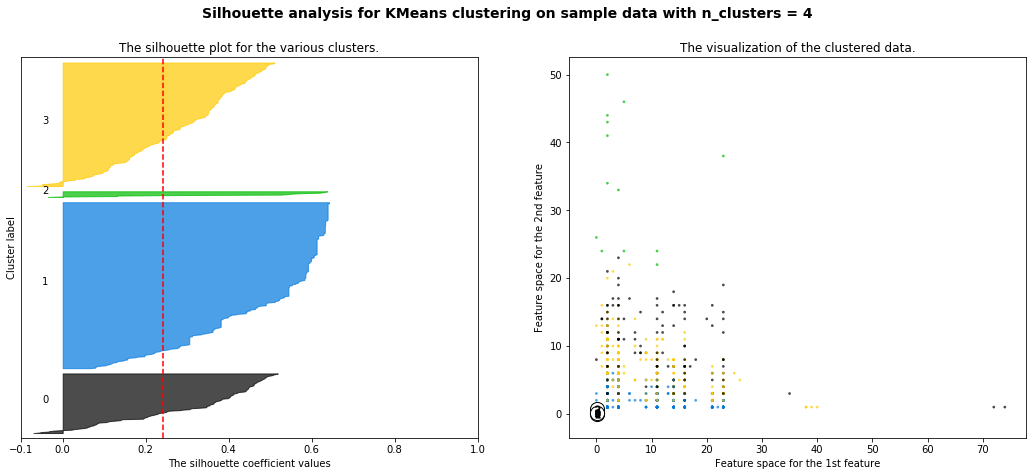

For n_clusters = 5 The average silhouette_score is : -0.03738642683413642


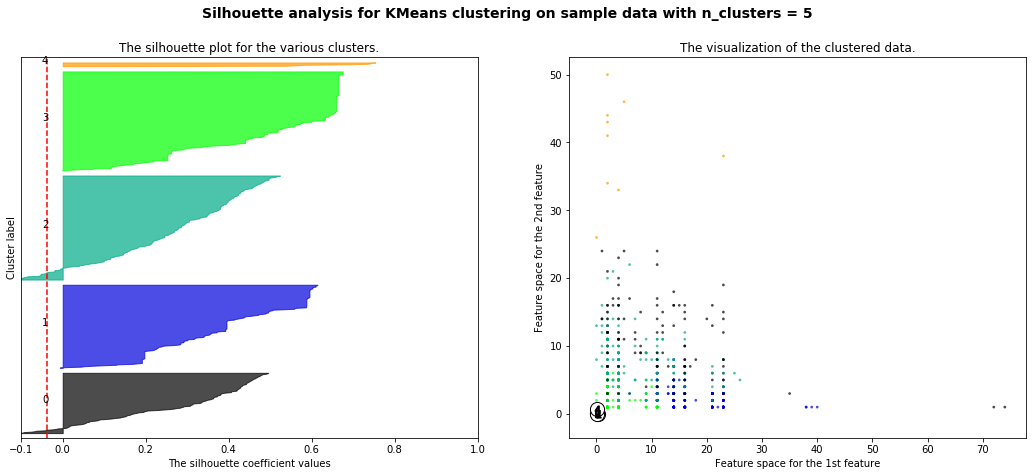

For n_clusters = 6 The average silhouette_score is : -0.04833111665559155


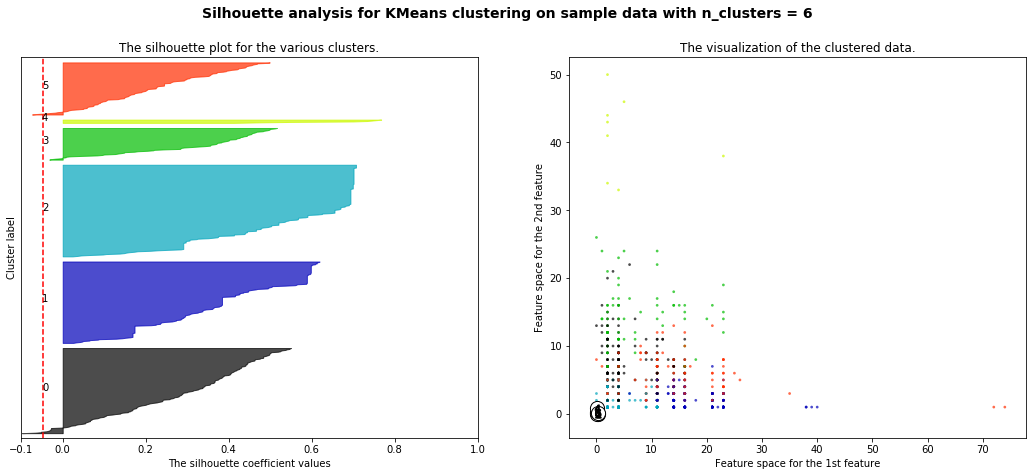

In [22]:

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = pl.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataset, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dataset[::, 0], dataset[::, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[::, 0], centers[::, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    pl.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    pl.show()

# AWS

## Dataset Original

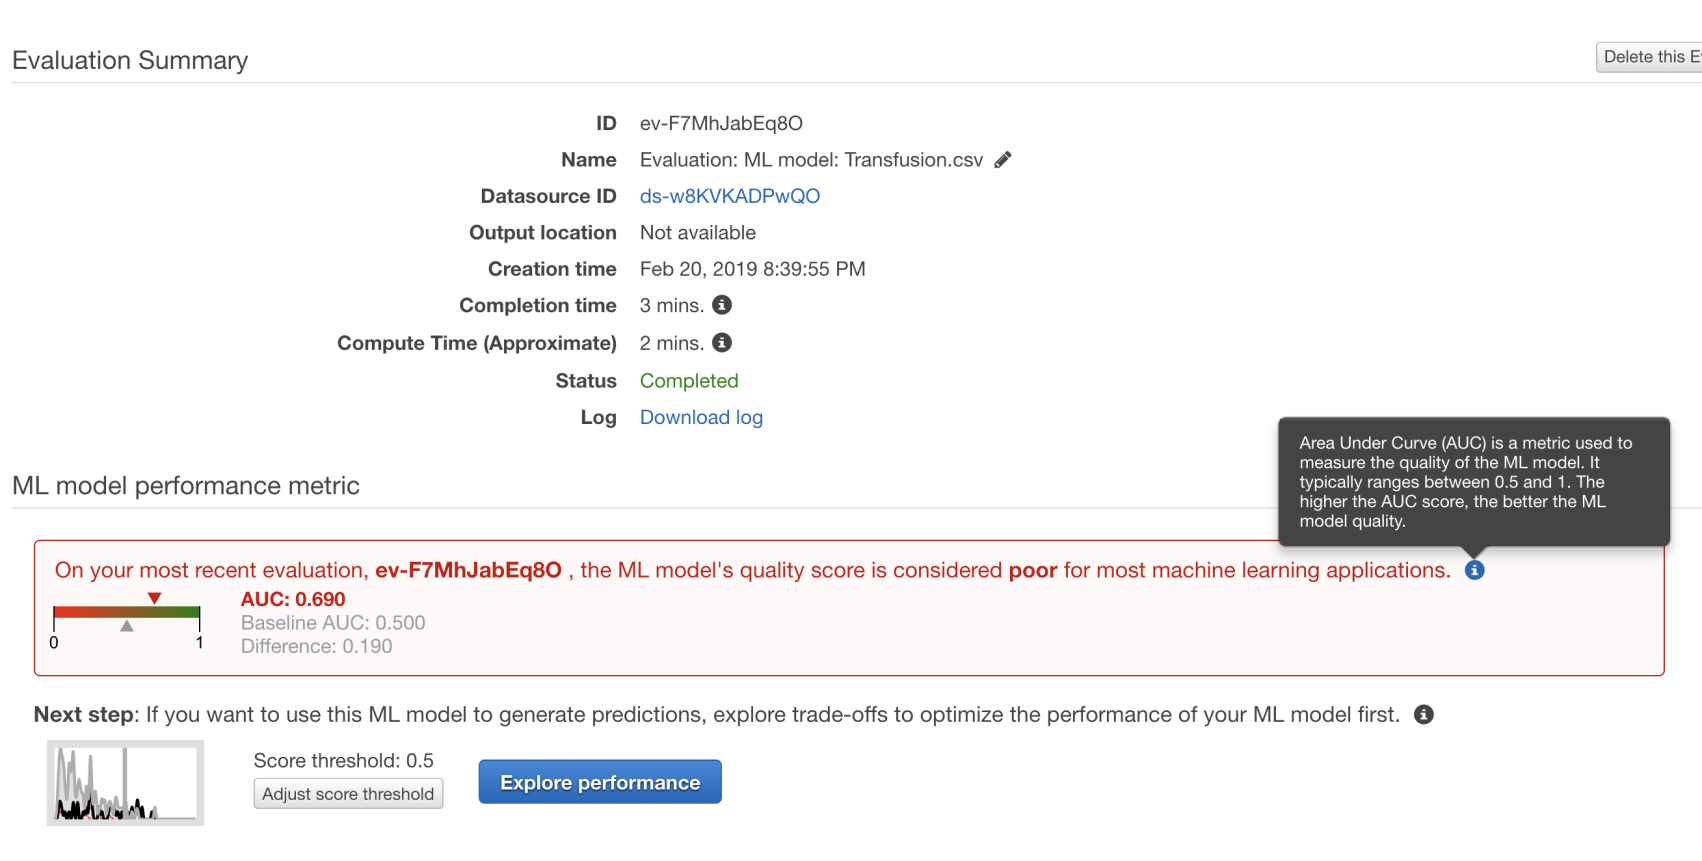

In [31]:
Image(filename='aws-original_auto.png', width=1500, height=20)

## Dataset Lighter

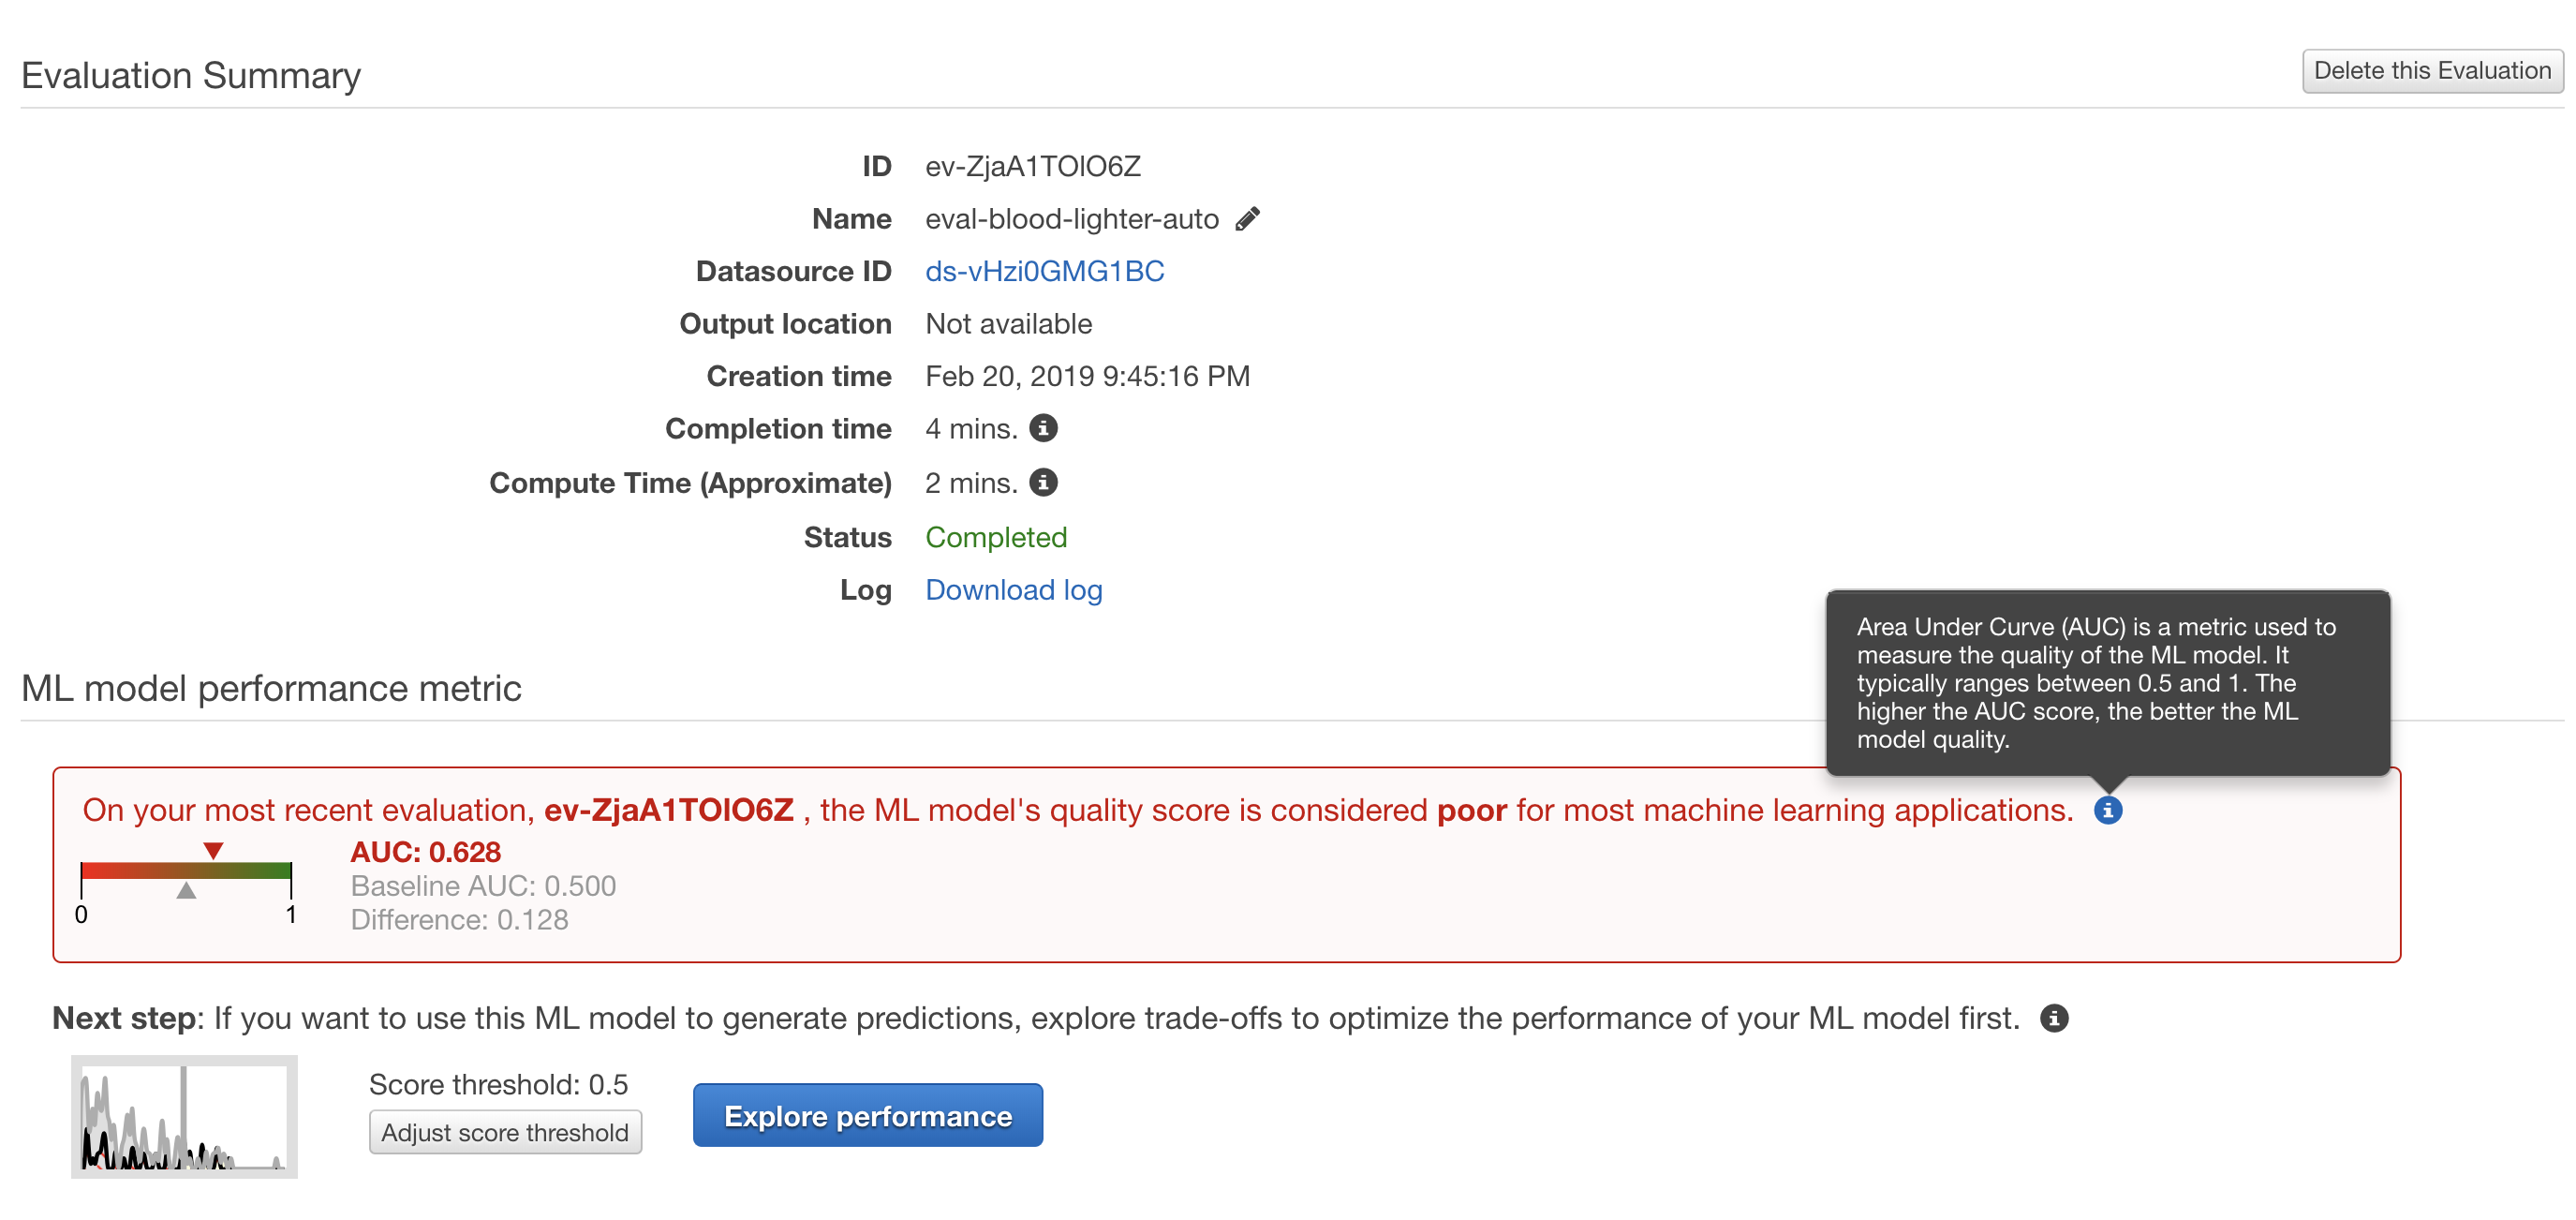

In [28]:
Image(filename='aws-lighter_auto.png', width=1500, height=20)

# KIBANA

## Présentation

## Analyse

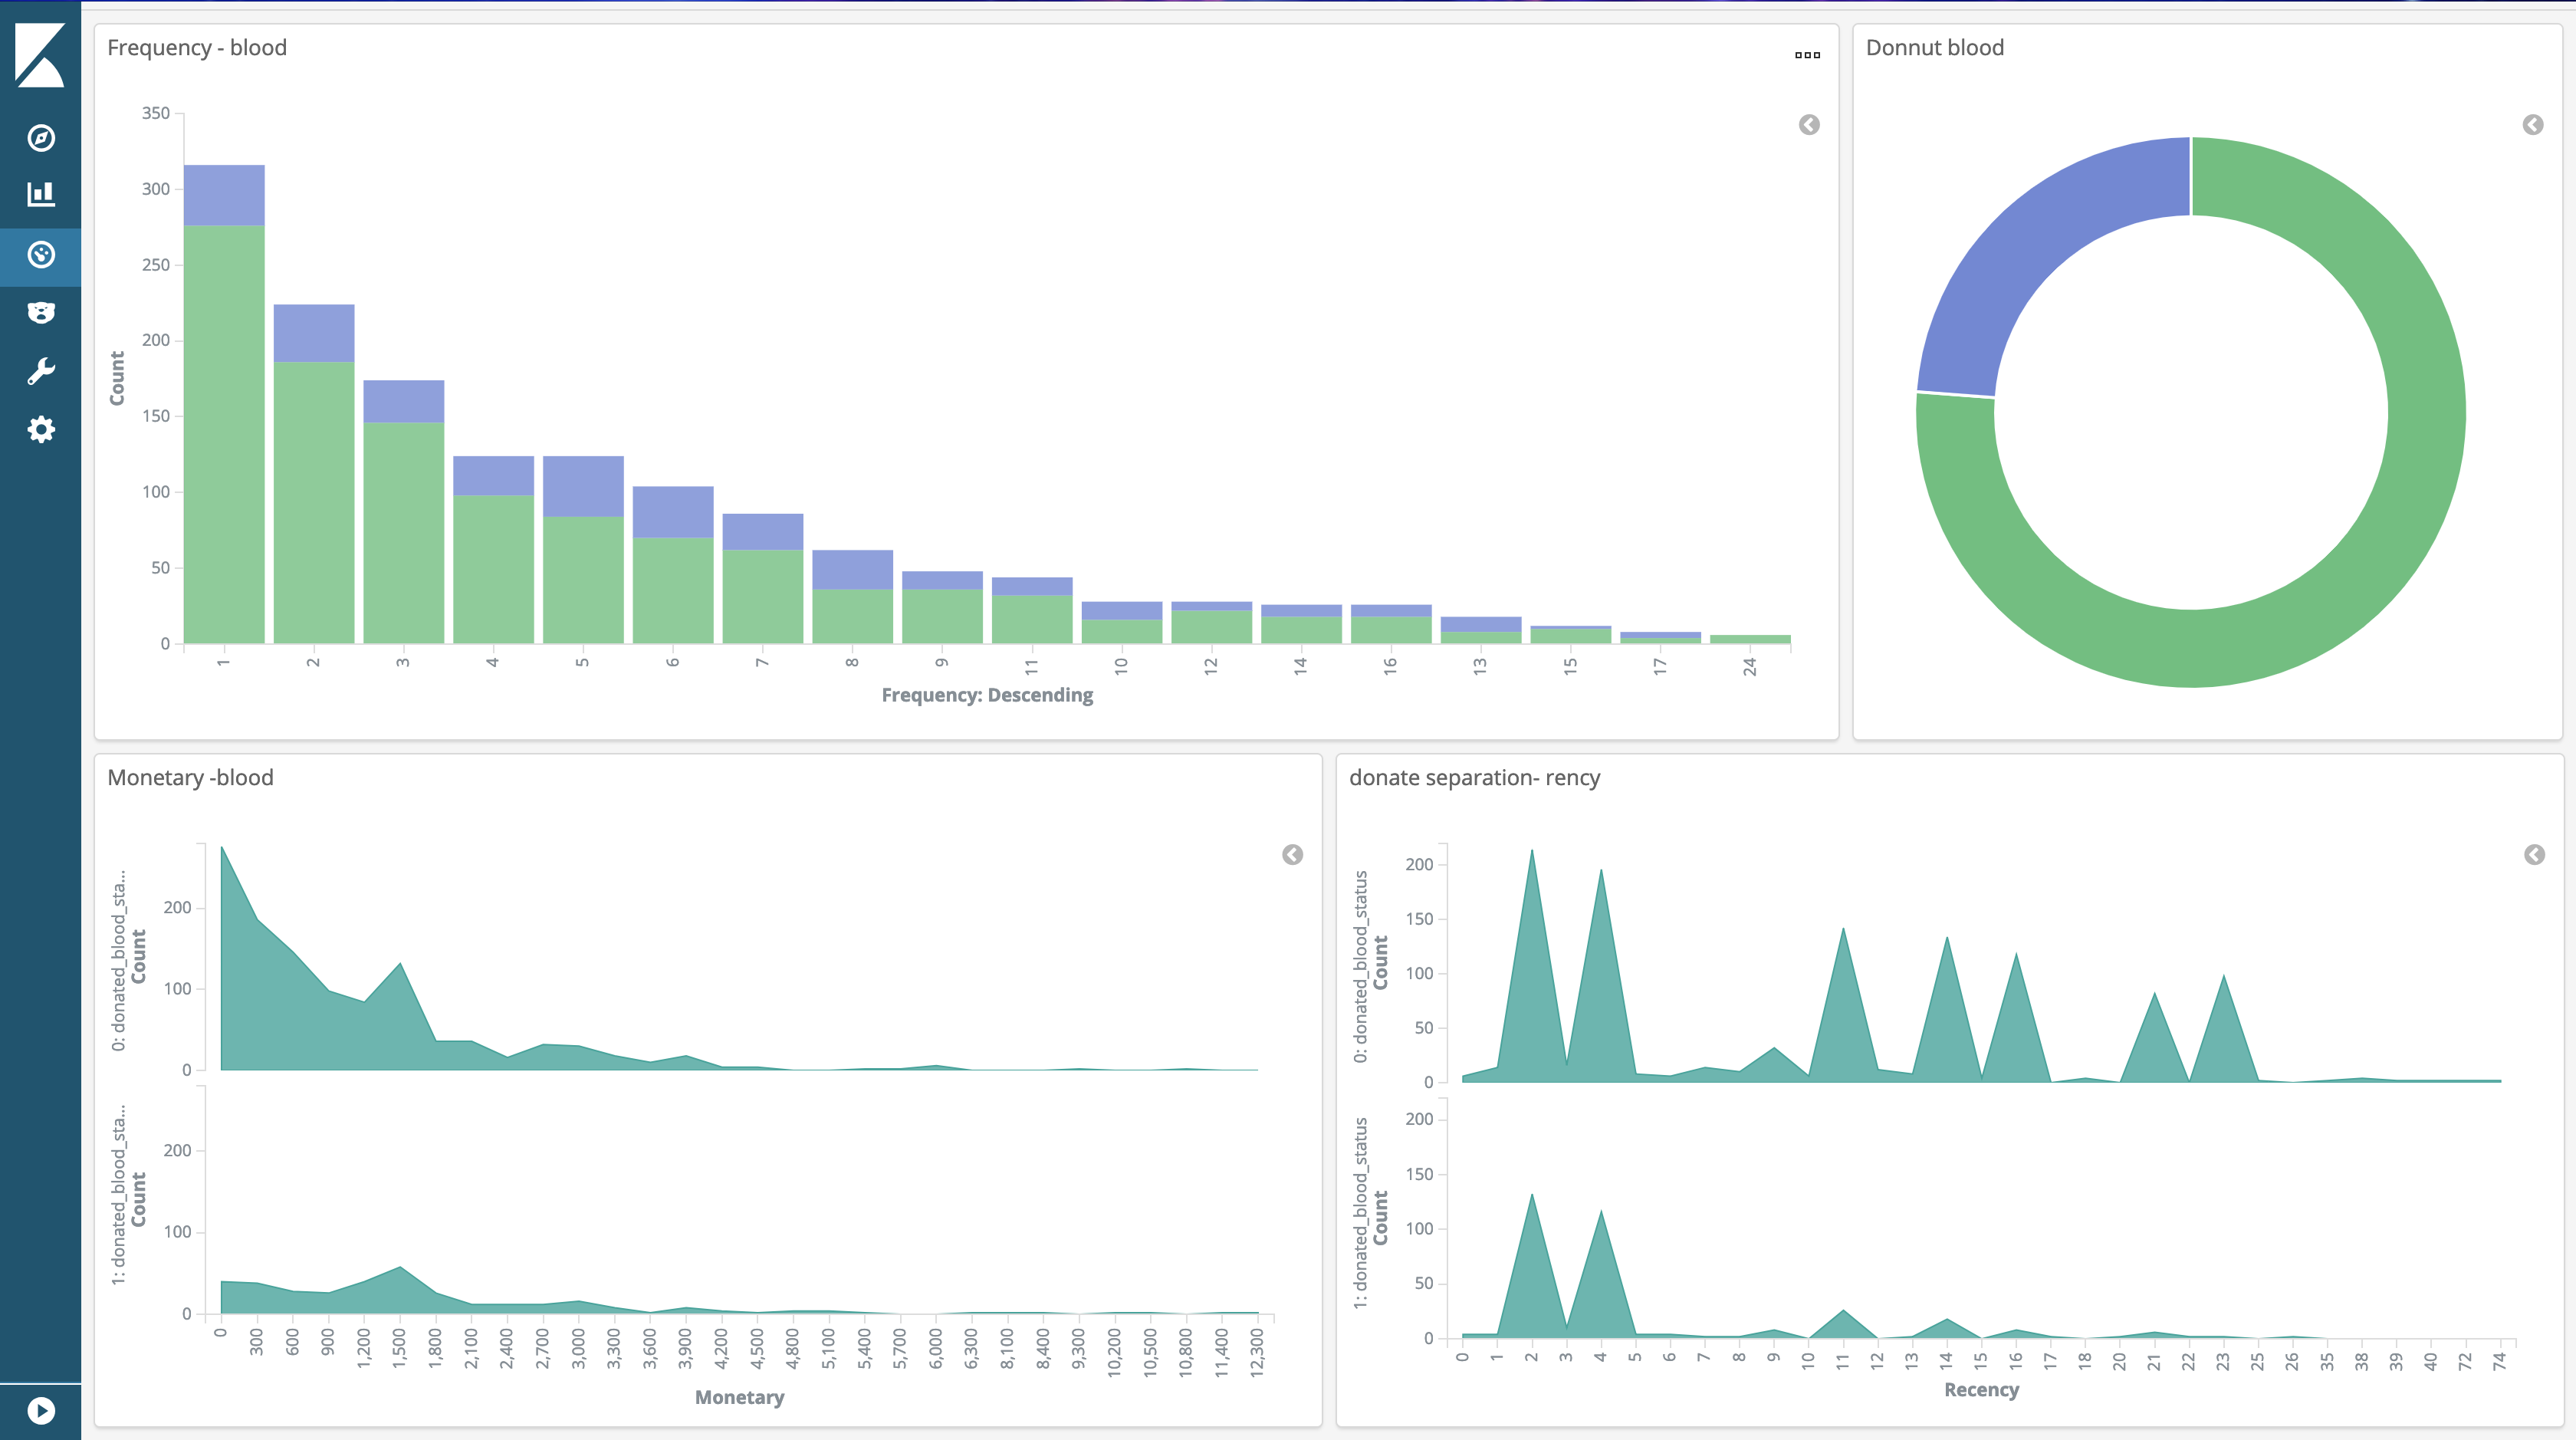

In [29]:
Image(filename='dashboard_1.png', width=1500, height=20)

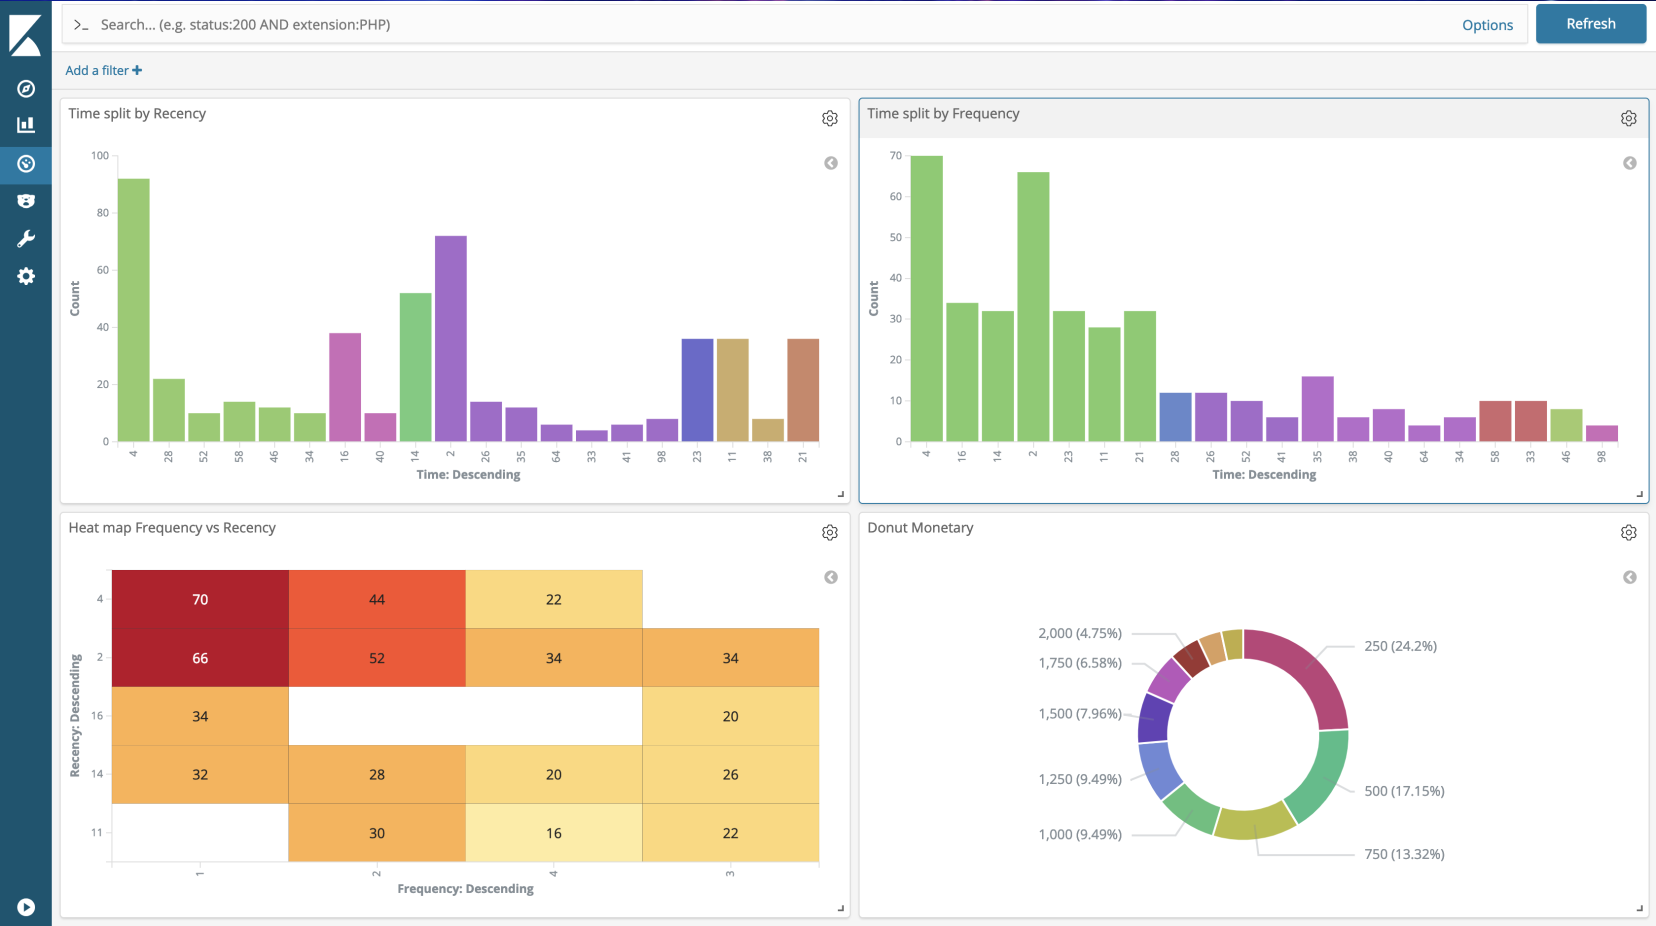

In [30]:
Image(filename='Dashboard_Recency_Frequency.png', width=1500, height=20)

## Interpretation